In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please change your hardware accelerator")

Metal device set to: Default GPU Device:/device:GPU:0
Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-06-12 15:51:09.572981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-12 15:51:09.573457: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-12 15:51:09.575727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-12 15:51:09.575748: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
columns = ['Model Name','Number of Params','Accuracy','Recall','Precision','F1_score']
resultat_df = pd.DataFrame(columns = columns)
resultat_df

,Model Name,Number of Params,Accuracy,Recall,Precision,F1_score


In [4]:
executant = input(str('Qui execute ce notebook ? Arthur, Aurelie, Ludovic ou Virginie'))
print('executant = {}'.format(executant))

if executant == 'Arthur':
    df = pd.read_csv('Dataframe/df_cleaned_arthur.csv')
elif executant == 'Aurelie':
    df = pd.read_csv('Dataframe/df_cleaned_aurelie.csv')
elif executant == 'Ludovic':
    df = pd.read_csv('Dataframe/df_cleaned_ludovic.csv')
elif executant == 'Virgine':
    df = pd.read_csv('Dataframe/df_cleaned_virgine.csv')

display(df.head())

executant = Arthur


,Path,target
0,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
1,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
2,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
3,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS
4,/Users/arthurnicolas/Desktop/Code/Projet DataS...,BAS


In [5]:
#séparation du dataframe en train et test
preprocessed_df = df.copy()
train_df, test_df = train_test_split(preprocessed_df, test_size=0.2, random_state = 2023)

print('le dataframe train a une taille de', train_df.shape)
#Nous reviendrons sur le trainset uniquement à la fin

le dataframe train a une taille de (13673, 2)


In [6]:
#méthodes décrites ici : https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_dataframe

datagen_train = ImageDataGenerator(rescale = None, validation_split = 0.2)
datagen_test = ImageDataGenerator(rescale = None)

batch_size = 32
height  = 360
width = 363
color = 3

train_set = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory=None,
    x_col='Path',
    y_col='target',
    target_size=(height, width),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    subset = "training"
)

validation_set = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory=None,
    x_col='Path',
    y_col='target',
    target_size=(360, 363),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    subset = "validation"
)

test_set = datagen_test.flow_from_dataframe(
    dataframe = test_df,
    directory=None, 
    x_col='Path',
    y_col='target',
    target_size=(360, 363),
    color_mode = 'rgb',
    classes = None,   # utilise y_col
    class_mode = 'categorical', 
    batch_size = batch_size, 
    shuffle = False)

nb_img_train = train_set.samples
nb_img_val = validation_set.samples
nb_img_test = test_set.samples
label_map = train_set.class_indices


print("le dataframe train est composé de {} images appartenant à {} classes".format(nb_img_train, len(train_set.class_indices)))
print("le dataframe validation est composé de {} images appartenant à {} classes".format(nb_img_val, len(validation_set.class_indices)))
print("le dataframe validation est composé de {} images appartenant à {} classes".format(nb_img_test, len(test_set.class_indices)))

Found 10939 validated image filenames belonging to 8 classes.
Found 2734 validated image filenames belonging to 8 classes.
Found 3419 validated image filenames belonging to 8 classes.
le dataframe train est composé de 10939 images appartenant à 8 classes
le dataframe validation est composé de 2734 images appartenant à 8 classes
le dataframe validation est composé de 3419 images appartenant à 8 classes


In [9]:
#benchmark entrainement avec le modèle proposé dans le tutorial tensorflow : https://www.tensorflow.org/tutorials/images/classification?hl=fr

num_classes = len(train_set.class_indices)

model_benchmark = Sequential([
  layers.Rescaling(1./255, input_shape=(height, width, color)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

2023-06-12 15:53:40.303829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-12 15:53:40.303881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
#Compiler le modèle
model_benchmark.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [11]:
#Résumé du modème
model_benchmark.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 360, 363, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 360, 363, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 180, 181, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 181, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        1

In [19]:
#mise en place de callbacks
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_loss', #métrique à controller
                                         min_delta = 0.01, # si au bout de 5 epochs la fonction de perte ne varie pas de 1%, que ce soit à la hausse ou à la baisse, on arrête au bout de 5 épochs
                                         patience=10,
                                         verbose = 0,
                                         mode='min',
                                         restore_best_weights=True)

lr_plateau = callbacks.ReduceLROnPlateau(monitor='val_loss', #métrique à controller
                                         factor=0.1, #factor by which the learning rate will be reduced. new_lr = lr * factor.
                                         patience=5, #number of epochs with no improvement after which learning rate will be reduced.
                                         verbose=0,
                                         mode='min')

In [20]:
#Entrainement du modèle
epochs=100
history_benchmark = model_benchmark.fit(
  train_set,
  validation_data=validation_set,
  steps_per_epoch = nb_img_train//batch_size,
  validation_steps = nb_img_val//batch_size,
  epochs=epochs,
  callbacks = [early_stopping, lr_plateau]
)

Epoch 1/100
341/341 [==============================] - 91s 266ms/step - loss: 0.1140 - accuracy: 0.9630 - val_loss: 0.2727 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 2/100
341/341 [==============================] - 92s 269ms/step - loss: 0.0979 - accuracy: 0.9662 - val_loss: 0.3145 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 3/100
341/341 [==============================] - 99s 291ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.3499 - val_accuracy: 0.9088 - lr: 0.0010
Epoch 4/100
341/341 [==============================] - 104s 304ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.2634 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 5/100
341/341 [==============================] - 109s 318ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.2971 - val_accuracy: 0.9187 - lr: 0.0010
Epoch 6/100
341/341 [==============================] - 117s 342ms/step - loss: 0.0937 - accuracy: 0.9694 - val_loss: 0.2472 - val_accuracy: 0.9276 - lr: 0.0010
Epoch 7/100
341/341 [======================

In [21]:
#sauvegarde des performances benchmark
train_acc_benchmark = history_benchmark.history['accuracy']
val_acc_benchmark = history_benchmark.history['val_accuracy']
train_loss_benchmark = history_benchmark.history['loss']
val_loss_benchmark = history_benchmark.history['val_loss']

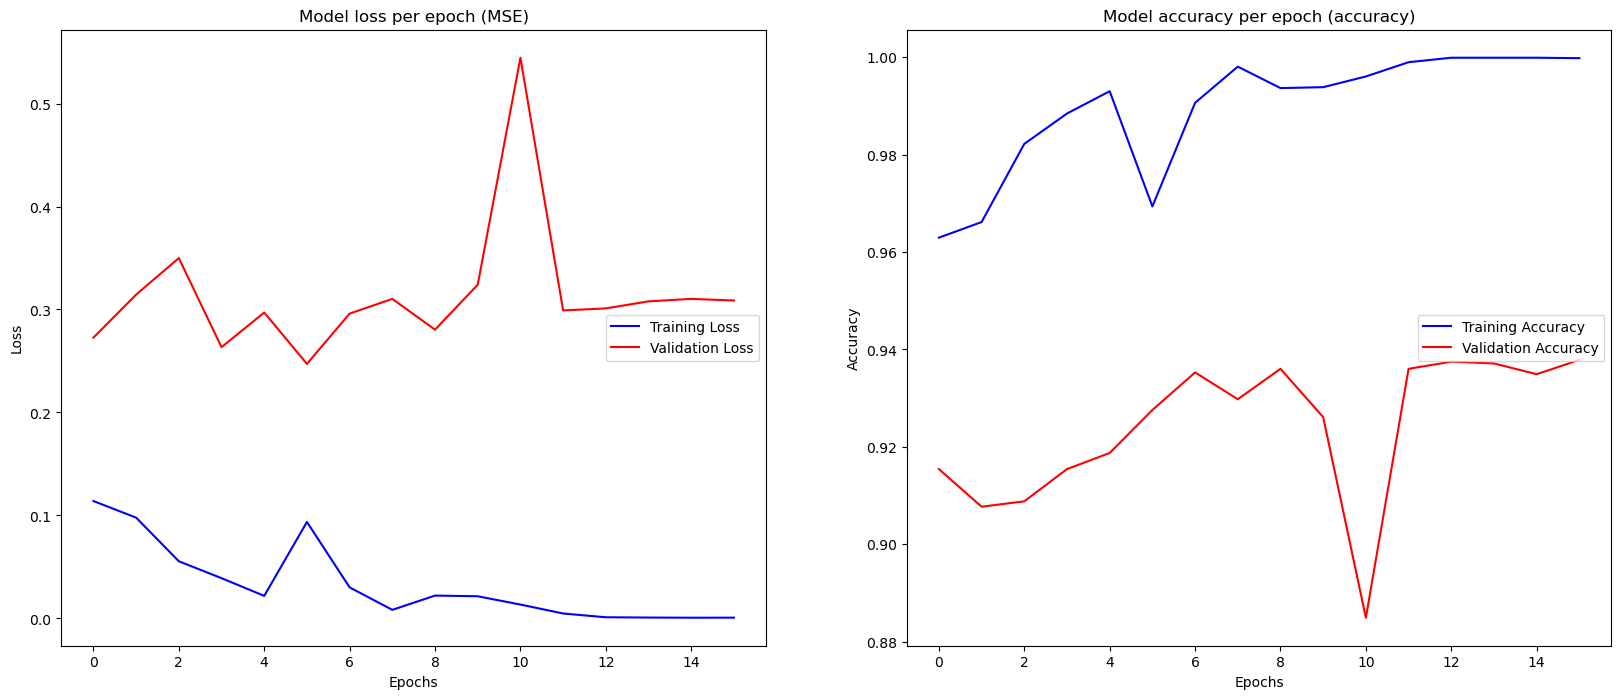

In [22]:
#visualisation des performances
plt.figure(figsize = (20, 8))

plt.subplot(121)
plt.plot(train_loss_benchmark, label = 'Training Loss', color = 'blue')
plt.plot(val_loss_benchmark, label = 'Validation Loss', color = 'red')
plt.title('Model loss per epoch (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='right')

plt.subplot(122)
plt.plot(train_acc_benchmark, label = 'Training Accuracy', color = 'blue')
plt.plot(val_acc_benchmark, label = 'Validation Accuracy', color = 'red')
plt.title('Model accuracy per epoch (accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='right')

plt.show()

In [24]:
#Prediction
predictions_benchmark = model_benchmark.predict(test_set)
y_pred_benchmark = tf.argmax(predictions_benchmark, axis = 1)

107/107 [==============================] - 9s 81ms/step


In [25]:
#Création d'une Matrice de confusion
def plot_matrix(y_true, y_pred, label):
  cm = confusion_matrix(y_true.classes, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
  print('Vous retrouverez la matrice de confusion du modèle ci-dessous:')
  plt.figure()
  disp.plot(cmap=plt.cm.Blues)
  plt.show()

  print('\nVous retrouverez le rapport de classification du modèle ci-dessous:\n')
  print(classification_report(y_true.classes, y_pred, target_names=label))

Vous retrouverez la matrice de confusion du modèle ci-dessous:


<Figure size 640x480 with 0 Axes>

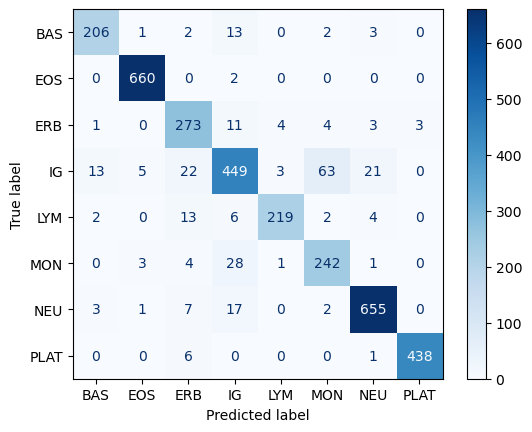


Vous retrouverez le rapport de classification du modèle ci-dessous:

              precision    recall  f1-score   support

         BAS       0.92      0.91      0.91       227
         EOS       0.99      1.00      0.99       662
         ERB       0.83      0.91      0.87       299
          IG       0.85      0.78      0.81       576
         LYM       0.96      0.89      0.93       246
         MON       0.77      0.87      0.81       279
         NEU       0.95      0.96      0.95       685
        PLAT       0.99      0.98      0.99       445

    accuracy                           0.92      3419
   macro avg       0.91      0.91      0.91      3419
weighted avg       0.92      0.92      0.92      3419



In [26]:
plot_matrix(y_true = test_set, y_pred = y_pred_benchmark,label =label_map)

Certaines classes sont avec un modèle basique déjà très bien identifié comme : 
- Platelet
- Eosinophils
- Neutrophils
- Lymphocytes
- Erythroblasts

Je sauvegarde le modèle :

In [27]:
#save model
model_benchmark.save('Model/model_benchmark')

INFO:tensorflow:Assets written to: Model/model_benchmark/assets


INFO:tensorflow:Assets written to: Model/model_benchmark/assets


In [28]:
def ajout_dataframe(nom_model, y_true, y_pred, num_params, dataframe):
  accuracy= []
  recall =[]
  precision = []
  f1 = []

  model_names = nom_model
  accuracy.append(round(accuracy_score(y_true.classes, y_pred),4))
  recall.append(round(recall_score(y_true.classes, y_pred, average='macro'),4))
  precision.append(round(precision_score(y_true.classes, y_pred, average='macro'),4))
  f1.append(round(f1_score(y_true.classes, y_pred, average='macro'),4))

  result_model = {'Model Name': model_names,'Number of Params': num_params,'Accuracy':accuracy,'Recall':recall, 'Precision':precision, 'F1_score': f1}
  dataframe = dataframe.append(result_model, ignore_index=True)
  return dataframe

In [29]:
ajout_dataframe(nom_model = 'model_benchmark', y_true = test_set, y_pred = y_pred_benchmark, num_params = 16613544, dataframe = resultat_df)

/var/folders/3n/f6d56q4s4kd6ff242f07thzr0000gn/T/ipykernel_15802/3420017913.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(result_model, ignore_index=True)


,Model Name,Number of Params,Accuracy,Recall,Precision,F1_score
0,model_benchmark,16613544,[0.919],[0.9119],[0.9084],[0.9092]


In [ ]:
#loading model
#model_benchmark = tf.keras.models.load_model('gdrive/MyDrive/Datascientest/saved_model/model_benchmark')
#model_benchmark.summary()

## Comparaison des résultats avec du transfer learning

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

n_class = 8 #nombre de classes du train/test

#importation du modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 

# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

vgg16 = Sequential()
vgg16.add(base_model) # Ajout du modèle VGG16
vgg16.add(GlobalAveragePooling2D()) 
vgg16.add(Dense(1024,activation='relu'))
vgg16.add(Dropout(rate=0.2))
vgg16.add(Dense(512, activation='relu'))
vgg16.add(Dropout(rate=0.2))
vgg16.add(Dense(n_class, activation='softmax'))

#Compiler le modèle
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#affichage du summary du modèle
vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

In [37]:
#Entrainement du modèle
epochs=100
history_vgg16 = vgg16.fit(
  train_set,
  validation_data=validation_set,
  steps_per_epoch = nb_img_train//batch_size,
  validation_steps = nb_img_val//batch_size,
  epochs=epochs,
  callbacks = [early_stopping, lr_plateau],
  verbose = 2
)

Epoch 1/100
  4/341 [..............................] - ETA: 10:11 - loss: 0.2277 - accuracy: 0.9297

KeyboardInterrupt: 